In [1]:
%matplotlib inline
import numpy as np
MEPS = np.finfo(float).eps
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update({'font.size': 14})

from sympy import *

from rbf import *

In [32]:
r, eps = symbols('r eps')
phi = r**18 * log(r)

In [33]:
diff(phi, r, r).simplify()

r**16*(306*log(r) + 35)

In [34]:
expr = phi
name = 'rbf'
expr_str = str(expr).replace('exp','np.exp')
expr_str = expr_str.replace('sqrt', 'np.sqrt')
expr_str = expr_str.replace('log(', 'np.log(MEPS + ')
print('def %s(r, eps):\n\treturn %s' % (name, expr_str))
for name in ['phi1', 'phi2', 'phi3', 'phi4', 'phi5']:
    expr = (diff(expr, r)/r).simplify()
    expr_str = str(expr).replace('exp','np.exp')
    expr_str = expr_str.replace('sqrt', 'np.sqrt')
    expr_str = expr_str.replace('log(', 'np.log(MEPS + ')
    print('def %s(r, eps):\n\treturn %s' % (name, expr_str))
    
expr = phi
for name in ['drbf', 'd2rbf']:
    expr = diff(expr, r).simplify()
    expr_str = str(expr).replace('exp','np.exp')
    expr_str = expr_str.replace('sqrt', 'np.sqrt')
    expr_str = expr_str.replace('log(', 'np.log(MEPS + ')
    print('def %s(r, eps):\n\treturn %s' % (name, expr_str))

def rbf(r, eps):
	return r**18*np.log(MEPS + r)
def phi1(r, eps):
	return r**16*(18*np.log(MEPS + r) + 1)
def phi2(r, eps):
	return r**14*(288*np.log(MEPS + r) + 34)
def phi3(r, eps):
	return r**12*(4032*np.log(MEPS + r) + 764)
def phi4(r, eps):
	return r**10*(48384*np.log(MEPS + r) + 13200)
def phi5(r, eps):
	return r**8*(483840*np.log(MEPS + r) + 180384)
def drbf(r, eps):
	return r**17*(18*np.log(MEPS + r) + 1)
def d2rbf(r, eps):
	return r**16*(306*np.log(MEPS + r) + 35)


In [5]:
def d_approx(rbf, x, eps, h):
    return (rbf(x+h,eps)-rbf(x-h, eps))/(2*h)
def d2_approx(rbf, x, eps, h):
    return (rbf(x+h,eps)+rbf(x-h, eps)-2*rbf(x,eps))/h**2

In [6]:
rs = [0.001, .1, 1, 2]
h = 10**-5
eps = 1
tol = 10**-5
for rbf_label in rbf_labels:
    print(rbf_label)
    rbf_obj = rbf_dict[rbf_label]
    rbf = rbf_obj['rbf']
    drbf = rbf_obj['drbf']
    d2rbf = rbf_obj['d2rbf']
    zeta = rbf_obj['zeta']
    chi = rbf_obj['chi']
    beta = rbf_obj['beta']
    for r in rs:
        '''
        print('\t%g'% (drbf(r,eps) - d_approx(rbf, r, eps, h)))
        print('\t%g'% (d2rbf(r,eps) - d2_approx(rbf, r, eps, h)))
        print('\t%g'% (zeta(r,eps) - d_approx(rbf, r, eps, h)/r))
        print('\t%g'% (chi(r,eps) - d_approx(zeta, r, eps, h)/r))
        print('\t%g'% (beta(r,eps) - d_approx(chi, r, eps, h)/r))
        '''
        print('r = %f' % r)
        print('d1 close: \t%r' % np.isclose(drbf(r,eps) , d_approx(rbf, r, eps, h), atol=tol ))
        print('d2 close: \t%r' % np.isclose(d2rbf(r,eps) , d2_approx(rbf, r, eps, h), atol=tol ))
        print('zeta close: \t%r' % np.isclose(zeta(r,eps) , d_approx(rbf, r, eps, h)/r, atol=tol ))
        print('chi close: \t%r' % np.isclose(chi(r,eps) , d_approx(zeta, r, eps, h)/r, atol=tol ))
        print('beta close: \t%r' % np.isclose(beta(r,eps) , d_approx(chi, r, eps, h)/r, atol=tol ))

gaussian
r = 0.001000
d1 close: 	True
d2 close: 	True
zeta close: 	True
chi close: 	True
beta close: 	True
r = 0.100000
d1 close: 	True
d2 close: 	True
zeta close: 	True
chi close: 	True
beta close: 	True
r = 1.000000
d1 close: 	True
d2 close: 	True
zeta close: 	True
chi close: 	True
beta close: 	True
r = 2.000000
d1 close: 	True
d2 close: 	True
zeta close: 	True
chi close: 	True
beta close: 	True
multiquadric
r = 0.001000
d1 close: 	True
d2 close: 	True
zeta close: 	True
chi close: 	True
beta close: 	True
r = 0.100000
d1 close: 	True
d2 close: 	True
zeta close: 	True
chi close: 	True
beta close: 	True
r = 1.000000
d1 close: 	True
d2 close: 	True
zeta close: 	True
chi close: 	True
beta close: 	True
r = 2.000000
d1 close: 	True
d2 close: 	True
zeta close: 	True
chi close: 	True
beta close: 	True
inverse quadratic
r = 0.001000
d1 close: 	True
d2 close: 	True
zeta close: 	True
chi close: 	True
beta close: 	True
r = 0.100000
d1 close: 	True
d2 close: 	True
zeta close: 	True
chi close: 	Tru

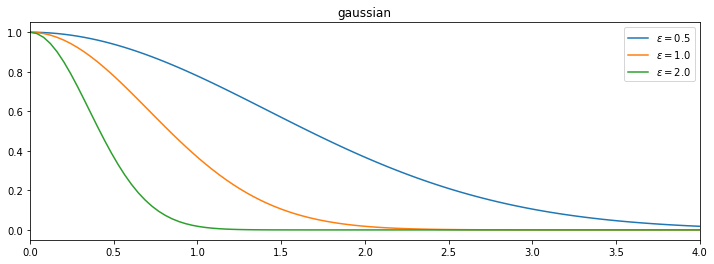

In [7]:
rbf_label = 'gaussian'
rbf_obj = rbf_dict[rbf_label]
rbf = rbf_obj['rbf']

xs = np.linspace(0, 4, 100, endpoint=True)
plt.figure(figsize=(12,4))
legend = []
for i, eps in enumerate([.5, 1, 2]):
    plt.plot(xs, rbf(xs, eps))
    legend += ['$\\varepsilon = %.1f$' % eps]
plt.legend(legend)
plt.xlim(0, 4)
plt.title(rbf_label)
plt.show()